In [8]:
import numpy as np
import matplotlib.pyplot as plt
from extrema_detection import find_potential_extrema, PWCT, find_corrected_extrema
from onset_offset_detection import find_onsets, find_offsets

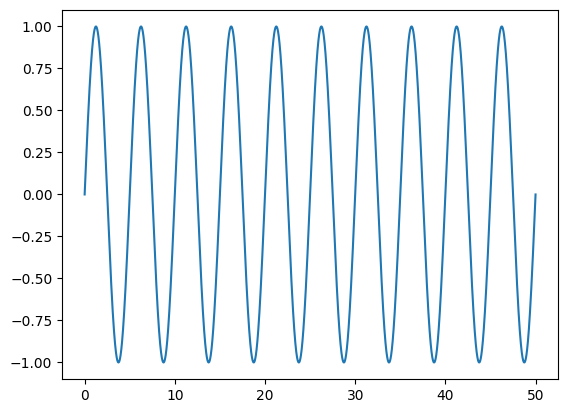

In [2]:
duration = 50
fs = 200
f = 0.2
x = np.linspace(0, duration, fs*duration)
y = np.sin(2*np.pi*f*x)
_ = plt.plot(x, y)

In [3]:
peaks, troughs = find_potential_extrema(y, fs)

In [4]:
peaks_idx, troughs_idx = PWCT(peaks, troughs)

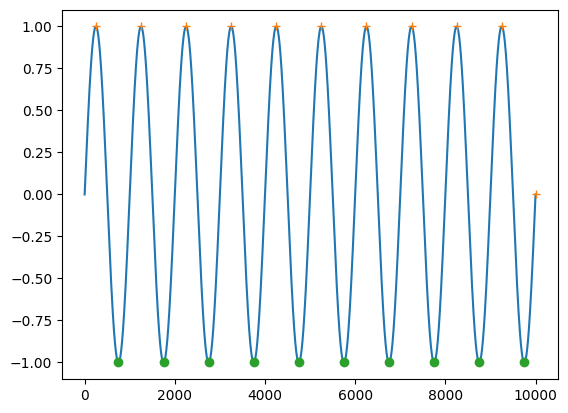

In [5]:
_ = plt.plot(y)
_ = plt.plot(peaks_idx, y[peaks_idx], '+')
_ = plt.plot(troughs_idx, y[troughs_idx], 'o')

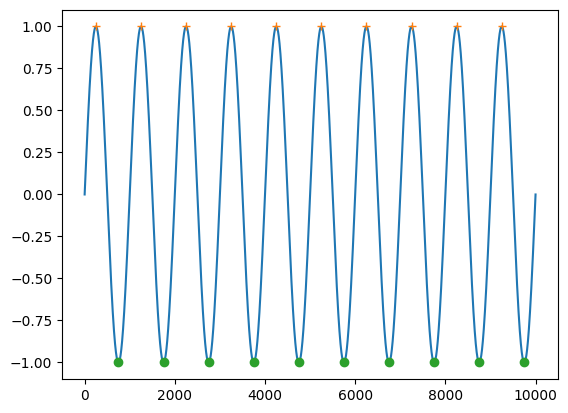

In [6]:
corrected_peaks, corrected_troughs = find_corrected_extrema(y, peaks_idx, troughs_idx)

_ = plt.plot(y)
_ = plt.plot(corrected_peaks, y[corrected_peaks], '+')
_ = plt.plot(corrected_troughs, y[corrected_troughs], 'o')

In [7]:
inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets = \
    find_onsets(y, np.array(corrected_peaks), np.array(corrected_troughs))

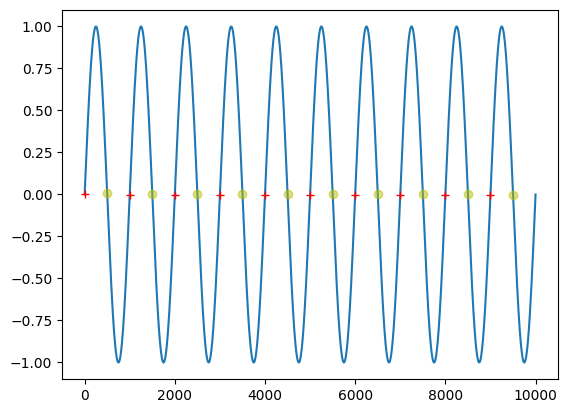

In [8]:
_ = plt.plot(y)
_ = plt.plot(inhale_onsets, y[inhale_onsets], 'r+')
_ = plt.plot(exhale_onsets, y[exhale_onsets], 'yo', alpha = .5)

In [9]:
inhale_offsets, exhale_offsets = find_offsets(y, inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets)

In [10]:
exhale_offsets

array([ 998., 1998., 2998., 3998., 4998., 5998., 6998., 7998., 8998.,
         nan])

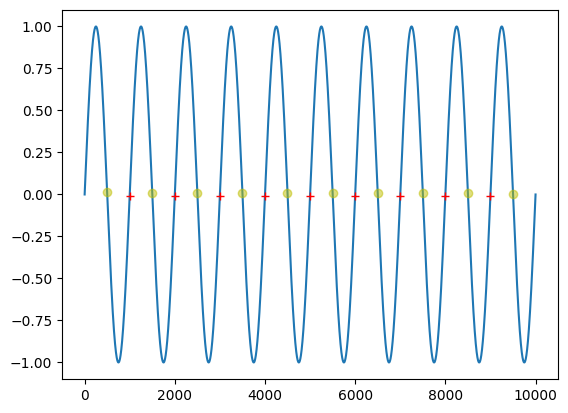

In [11]:
_ = plt.plot(y)
_ = plt.plot(inhale_offsets, y[inhale_offsets.astype(int)], 'yo', alpha = .5)
_ = plt.plot(exhale_offsets[:-1], y[exhale_offsets[:-1].astype(int)], 'r+')

In [14]:
def plot_corrected_vs_potential(signal, 
        potential_peaks, potential_troughs, \
        corrected_peaks, corrected_troughs):
    _ = plt.plot(signal, 'k', alpha = .1, label = 'signal')
    _ = plt.scatter(corrected_peaks, signal[corrected_peaks], marker=8, c='y', label='corrected peaks')
    _ = plt.scatter(corrected_troughs, signal[corrected_troughs], marker=10, c='y', label='corrected troughs')
    _ = plt.scatter(potential_peaks, signal[potential_peaks], marker=9, c='r', label='potential peaks')
    _ = plt.scatter(potential_troughs, signal[potential_troughs], marker=11, c='r', label='potential troughs')
    _ = plt.legend()

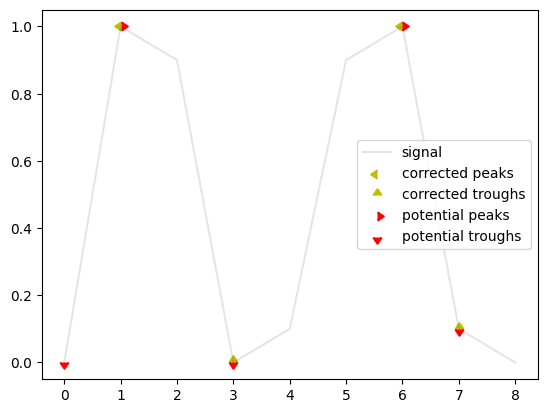

In [8]:
start_with_peak = np.array([0, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [1, 6]
potential_troughs = [0, 3, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

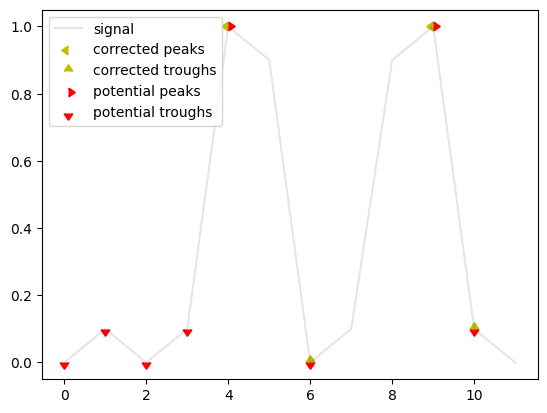

In [9]:
start_with_peak = np.array([0,.1, 0, .1, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [4, 9]
potential_troughs = [0, 1, 2, 3, 6, 10]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

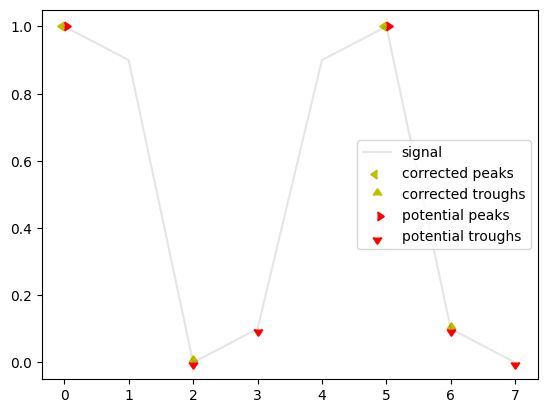

In [10]:
remove_trough = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 5]
potential_troughs = [2, 3, 6, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

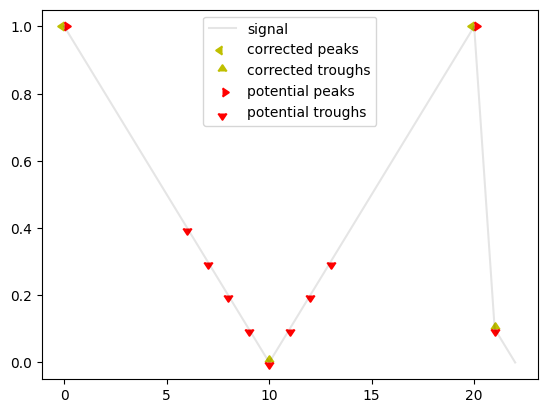

In [11]:
remove_trough = np.array([1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [0, 20]
potential_troughs = [6, 7, 8, 9, 10, 11, 12, 13, 21]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

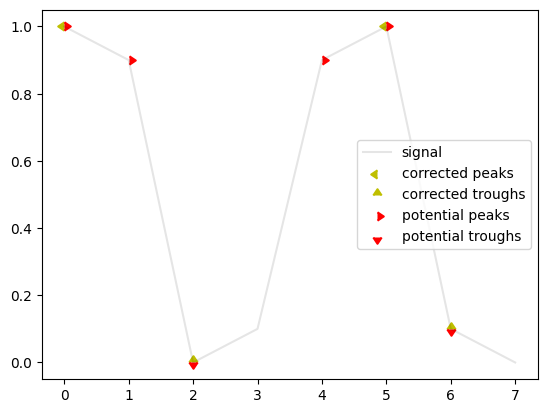

In [12]:
remove_peak = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 1, 4, 5]
potential_troughs = [2, 6]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

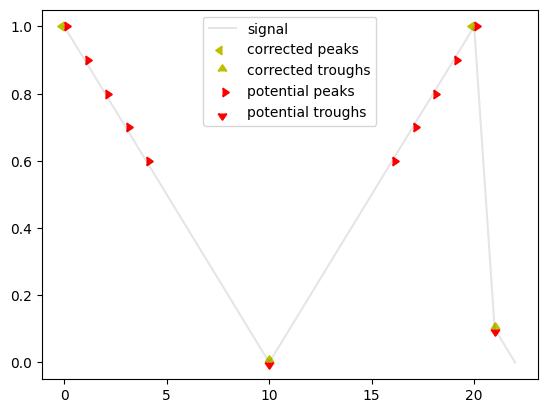

In [13]:
remove_peaks = np.array([1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [0, 1, 2, 3, 4, 16, 17, 18, 19, 20]
potential_troughs = [10, 21]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_peaks, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_peaks, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

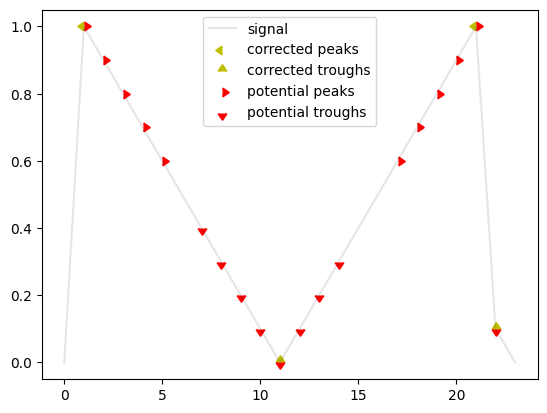

In [14]:
remove_everything = np.array([0, 1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [1,  2,  3,  4,  5, 17, 18, 19, 20, 21]
potential_troughs = [7,  8,  9, 10, 11, 12, 13, 14, 22]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_everything, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_everything, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

In [13]:
!python -m unittest

......
----------------------------------------------------------------------
Ran 6 tests in 0.001s

OK


In [16]:
#!pip install --upgrade numpy==1.21.6

In [17]:
#!pipreqs . --force

In [14]:
!pip install pylint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 9.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 10.0 MB/s eta 0:00:00
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00


In [17]:
!pip install 'pylint[spelling]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.7 MB/s eta 0:00:00


In [18]:
!pylint ./extrema_detection/_findExtrema.py

************* Module extrema_detection._findExtrema
extrema_detection/_findExtrema.py:11:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:29:25: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:34:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:36:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:40:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:46:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:56:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:61:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:62:0: C0301: Line too long (111/100) (line-too-long)
extrema_detection/_findExtrema.py:83:0: C0303: Trailing whitespace (trailing-whitespace)
extrema_detection/_findExtrema.py:87:0: C0303: Trailing whi

In [24]:
!black .

reformatted /Users/rima/Desktop/breathmetrics-Python/extrema_detection/__init__.py
reformatted /Users/rima/Desktop/breathmetrics-Python/onset_offset_detection/__init__.py
reformatted /Users/rima/Desktop/breathmetrics-Python/extrema_detection/_findExtrema.py
reformatted /Users/rima/Desktop/breathmetrics-Python/tests/test_findCorrectExtrema.py
reformatted /Users/rima/Desktop/breathmetrics-Python/onset_offset_detection/_findOnsetOffset.py
reformatted /Users/rima/Desktop/breathmetrics-Python/demo.ipynb

All done! ✨ 🍰 ✨
6 files reformatted, 1 file left unchanged.


In [25]:
!pylint .

************* Module .
__init__.py:1:0: F0010: error while code parsing: Unable to load file __init__.py:
[Errno 2] No such file or directory: '__init__.py' (parse-error)


In [26]:
pip install pre-commit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Using cached PyYAML-6.0-cp38-cp38-macosx_10_9_x86_64.whl (192 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 6.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mne
file = "./data/breaths/swiss398_ntx03_0.9dl50_streaming_1-1.EDF"
data = mne.io.read_raw_edf(file)
#Data
raw_data = data.get_data()
#Metadata
info = data.info
channels = data.ch_names

Extracting EDF parameters from /Users/rima/Desktop/breathmetrics-python/data/breaths/swiss398_ntx03_0.9dl50_streaming_1-1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: Tho1, Nas1
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2022-11-08 09:51:34 UTC
 nchan: 2
 projs: []
 sfreq: 2000.0 Hz
>

In [4]:
channels

['Tho1', 'Nas1']

In [6]:
raw_data.shape

(2, 7350000)

In [16]:
raw_data

array([[-0.65875454, -0.65875454, -0.65593589, ..., -0.0978433 ,
        -0.0978433 , -0.0978433 ],
       [-0.27013219, -0.27013219, -0.27013219, ...,  8.08591187,
         8.08591187,  8.08591187]])

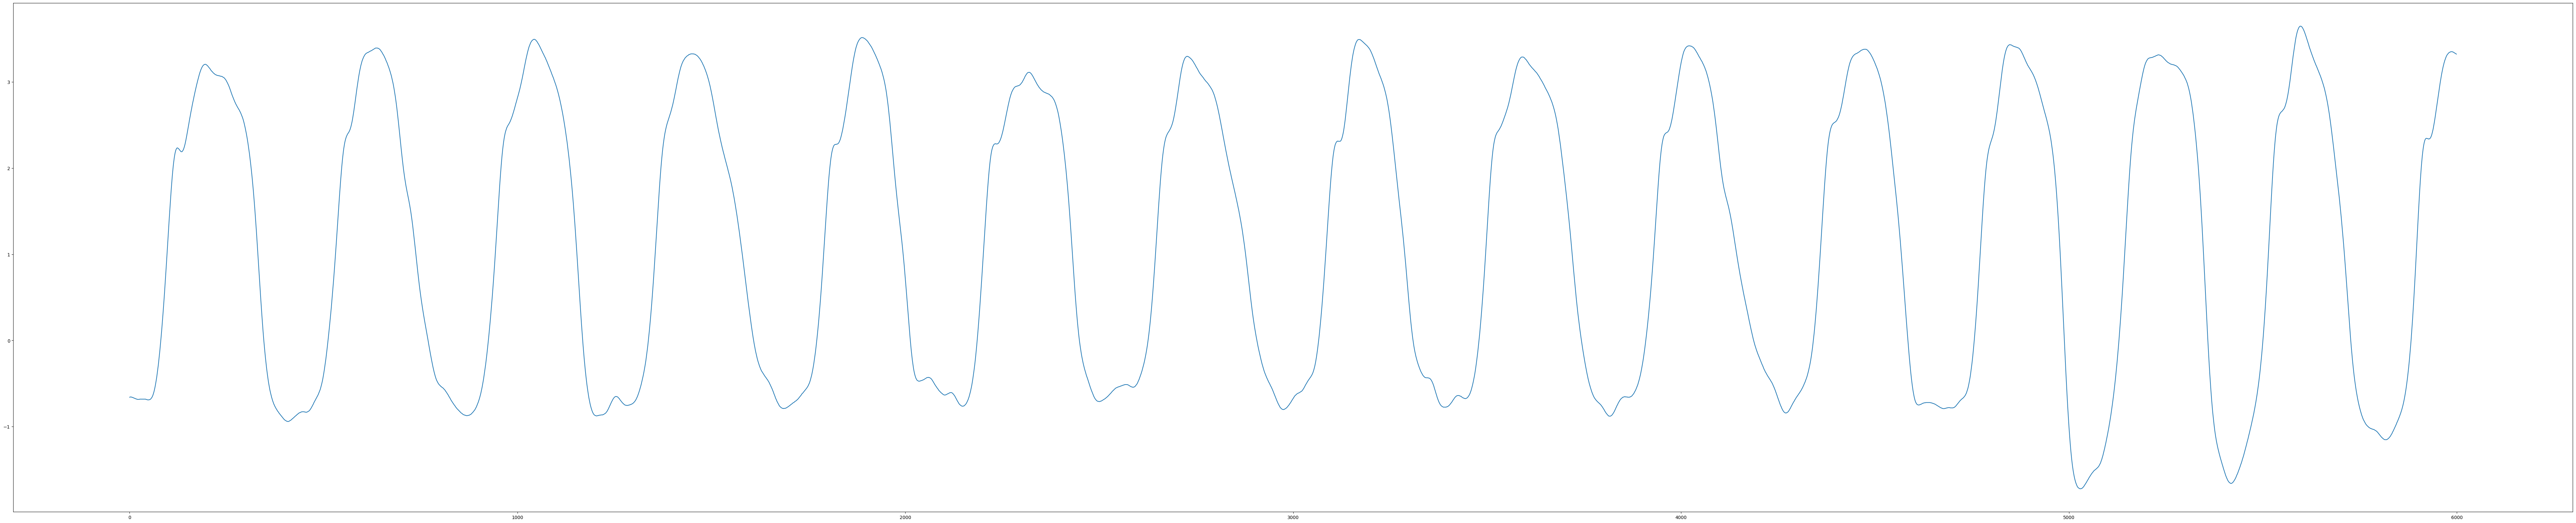

In [27]:
plt.figure(figsize=(100, 20))
plt.plot(raw_data[0][:6000])

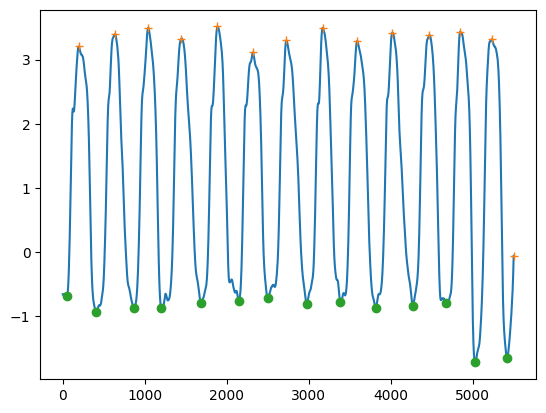

In [52]:
i = 0
y = raw_data[0][i :i + 5500]
fs = 200
peaks, troughs = find_potential_extrema(y, fs)
peaks_idx, troughs_idx = pwct(peaks, troughs)
_ = plt.plot(y)
_ = plt.plot(peaks_idx, y[peaks_idx], '+')
_ = plt.plot(troughs_idx, y[troughs_idx], 'o')

In [53]:
peaks_idx, troughs_idx

(array([ 194,  634, 1042, 1447, 1887, 2318, 2726, 3168, 3589, 4019, 4471,
        4847, 5230, 5499]),
 array([  46,  407,  868, 1203, 1686, 2146, 2499, 2974, 3387, 3814, 4269,
        4675, 5028, 5417]))

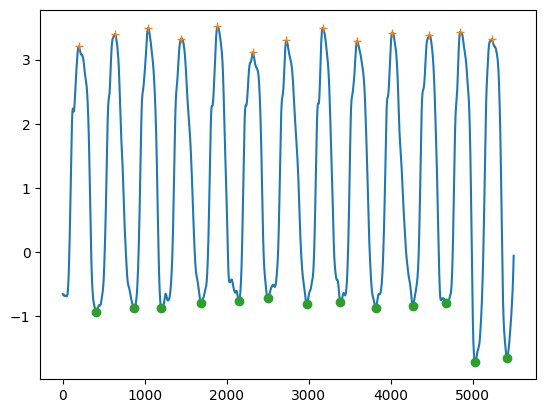

In [55]:
corrected_peaks, corrected_troughs = find_corrected_extrema(y, peaks_idx, troughs_idx)

_ = plt.plot(y)
_ = plt.plot(corrected_peaks, y[corrected_peaks], '+')
_ = plt.plot(corrected_troughs, y[corrected_troughs], 'o')

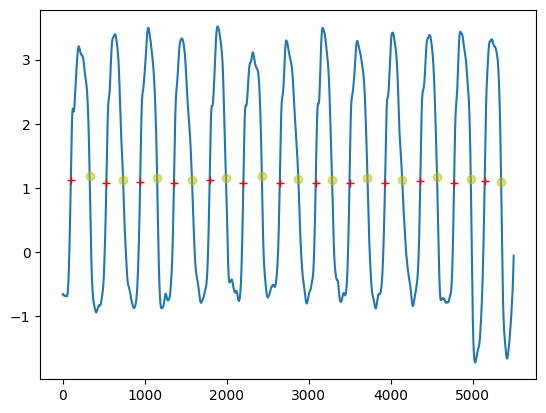

In [56]:
inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets = \
    find_onsets(y, np.array(corrected_peaks), np.array(corrected_troughs))
_ = plt.plot(y)
_ = plt.plot(inhale_onsets, y[inhale_onsets], 'r+')
_ = plt.plot(exhale_onsets, y[exhale_onsets], 'yo', alpha = .5)